# Linear Regression HandsOn

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [2]:
df = pd.read_csv('new_insurance_data.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [4]:
df.shape

(1338, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

### checking Null values

In [7]:
df.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [8]:
9/1338 *100

0.672645739910314

In [10]:
round(df.isnull().sum() / len(df) *100,   2)

age                                0.67
sex                                0.00
bmi                                0.22
children                           0.37
smoker                             0.00
Claim_Amount                       1.05
past_consultations                 0.45
num_of_steps                       0.22
Hospital_expenditure               0.30
NUmber_of_past_hospitalizations    0.15
Anual_Salary                       0.45
region                             0.00
charges                            0.00
dtype: float64

### Dropping Null Values

In [ ]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(1287, 13)

### Checking Outliers

<Axes: xlabel='age'>

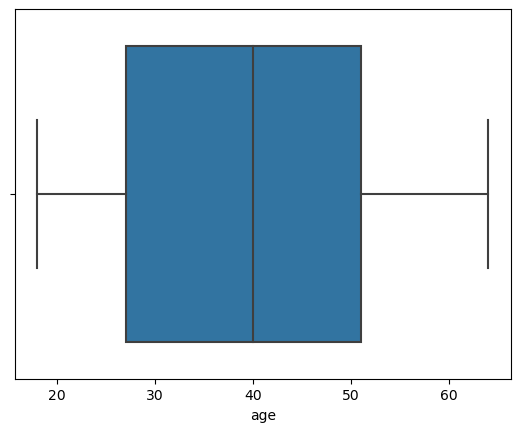

In [17]:
sns.boxplot(data=df, x='age')

In [18]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

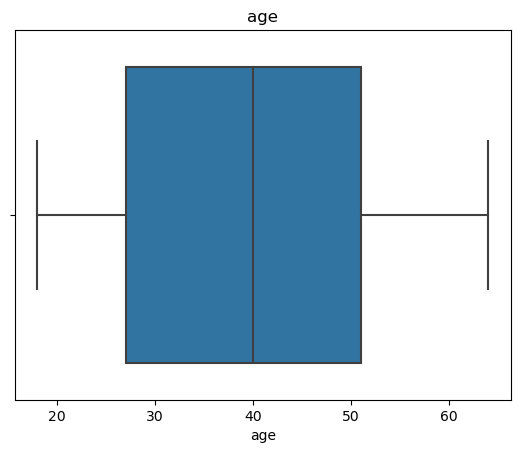

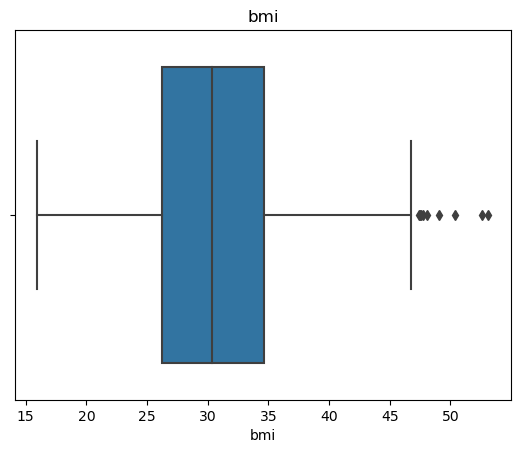

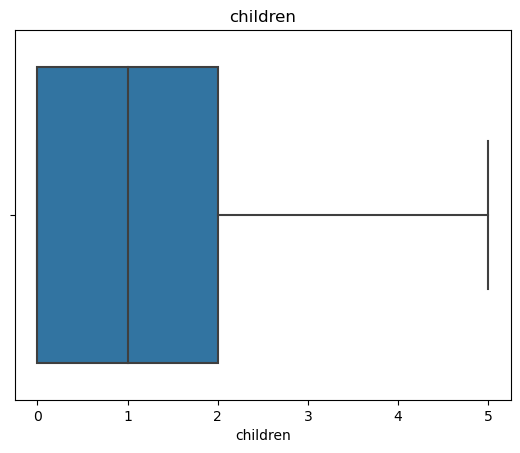

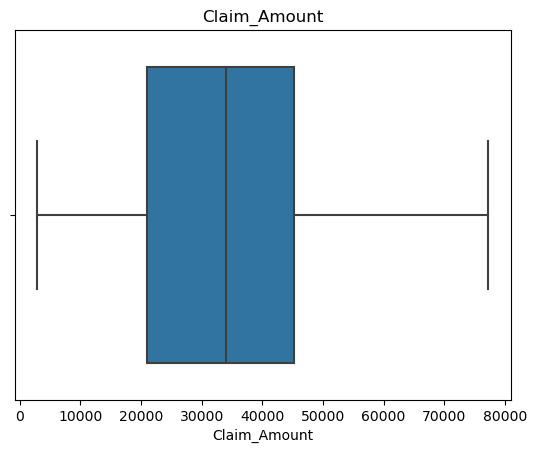

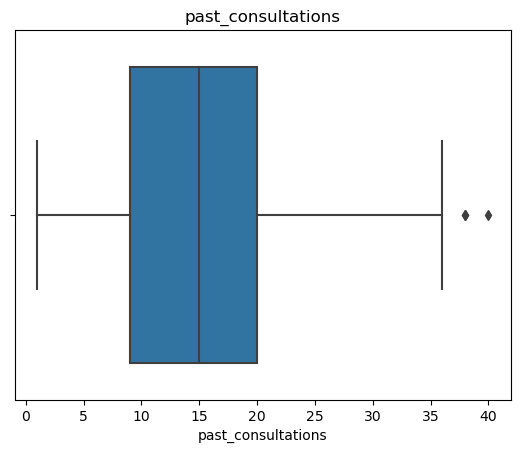

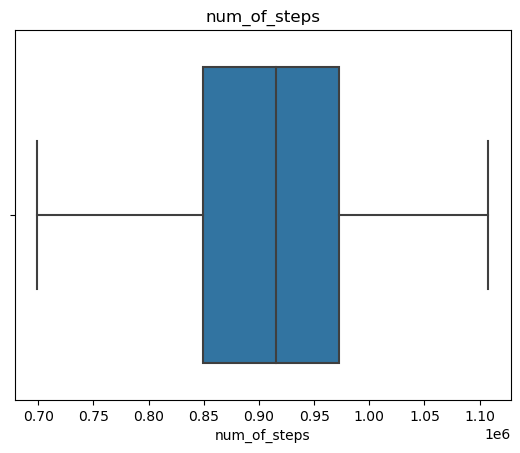

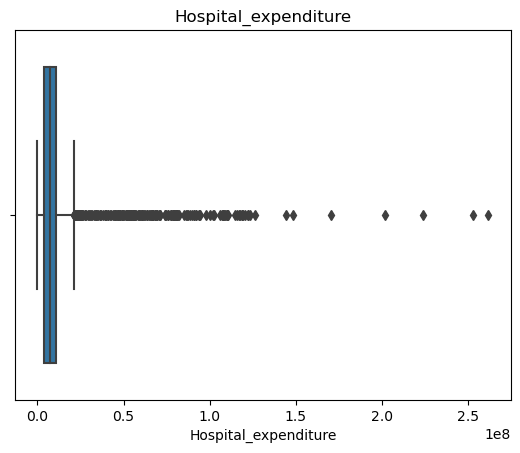

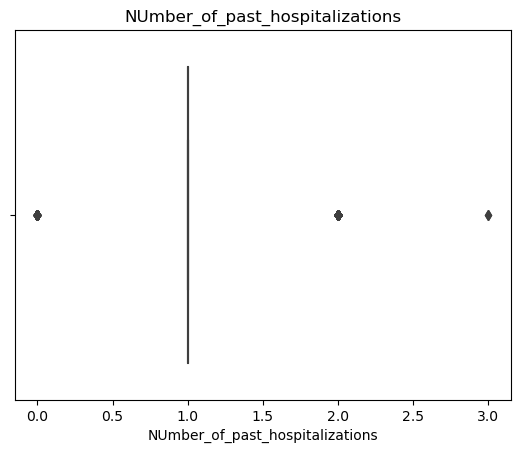

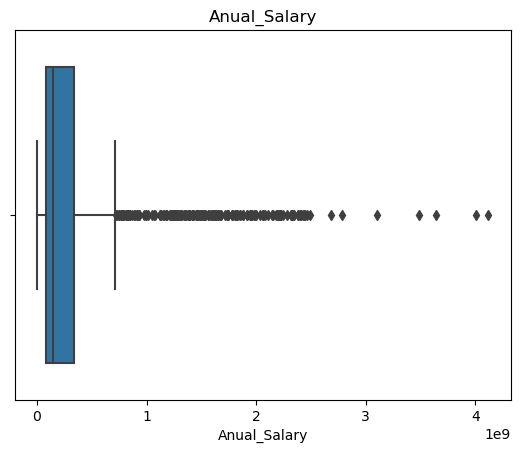

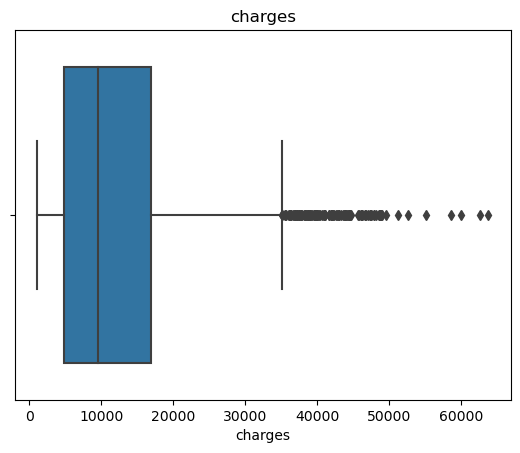

In [19]:
for col in df.columns:
    if df[col].dtype != 'object':
        sns.boxplot(data=df, x=col)
        plt.title(col)
        plt.show()

In [20]:
out_list = ['bmi','past_consultations', 'Hospital_expenditure','Anual_Salary', 'charges']

### Dropping Outliers

In [21]:
for col in out_list:
    
    Q1 = df[col].quantile(0.25)
    
    Q3 = df[col].quantile(0.75)
    
    IQR = Q3-Q1
    
    UL = Q3+1.5*IQR
    LL = Q1-1.5*IQR
    
    df = df[(df[col]>LL) & (df[col]<UL)]

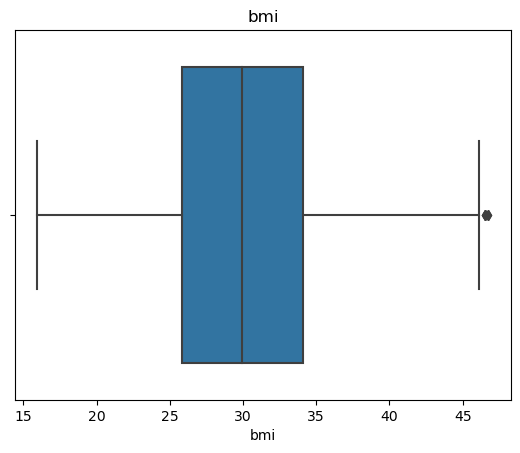

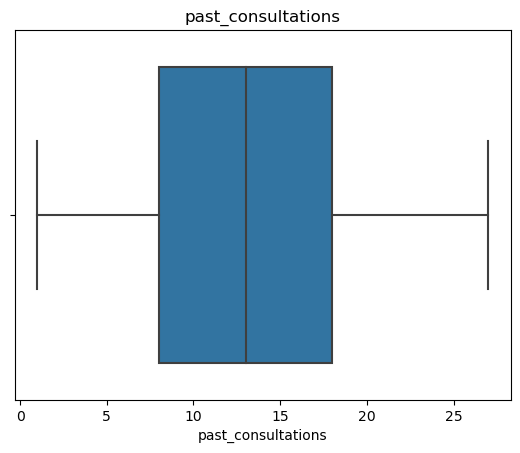

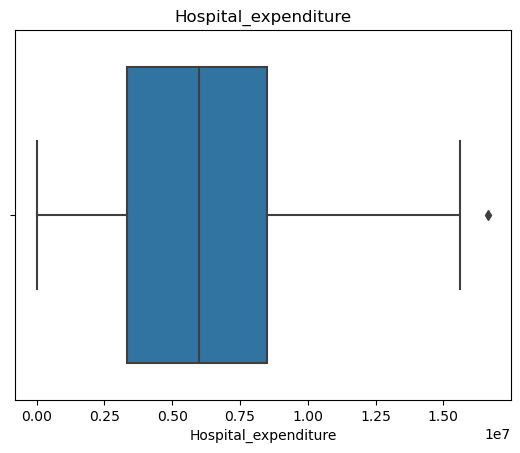

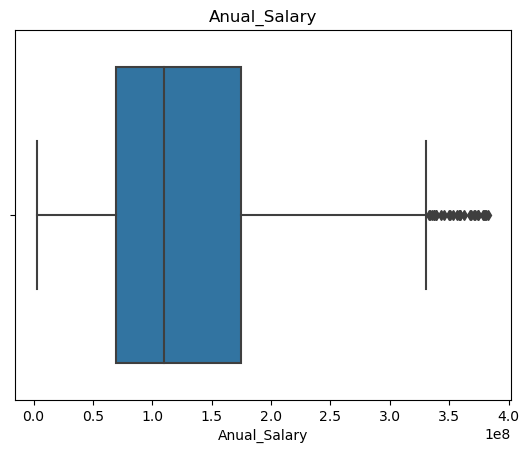

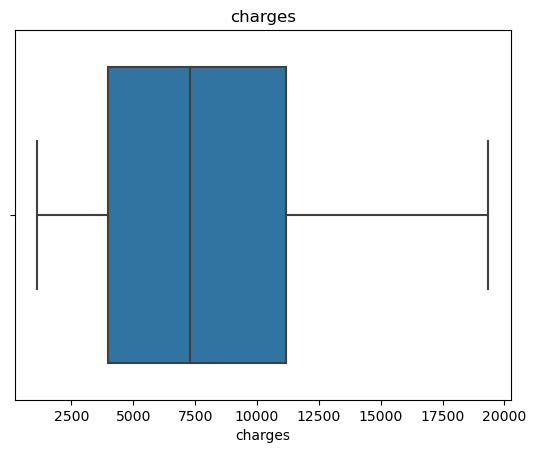

In [23]:
for col in out_list:
    
    sns.boxplot(data=df, x=col)
    plt.title(col)
    plt.show()

### Cheching Colinearity

In [24]:
# Single colinearity
# Multi-colinarity

In [25]:
df.corr()

C:\Users\Dell1\AppData\Local\Temp\ipykernel_17208\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
age,1.000000,0.157363,0.046903,0.106907,0.178307,0.763756,0.161881,0.527364,0.508866,0.682315
bmi,0.157363,1.000000,0.012556,0.013019,0.017543,0.043881,0.013951,0.022507,0.007997,0.019630
children,0.046903,0.012556,1.000000,0.037777,0.043747,0.219064,-0.008496,0.309678,0.066027,0.131216
Claim_Amount,0.106907,0.013019,0.037777,1.000000,0.070665,0.187298,0.050630,0.108704,0.169931,0.194932
past_consultations,0.178307,0.017543,0.043747,0.070665,1.000000,0.265269,0.088732,0.135027,0.273144,0.286770
num_of_steps,0.763756,0.043881,0.219064,0.187298,0.265269,1.000000,0.309669,0.715836,0.794464,0.942969
Hospital_expenditure,0.161881,0.013951,-0.008496,0.050630,0.088732,0.309669,1.000000,0.131773,0.378125,0.366163
NUmber_of_past_hospitalizations,0.527364,0.022507,0.309678,0.108704,0.135027,0.715836,0.131773,1.000000,0.373849,0.532328
Anual_Salary,0.508866,0.007997,0.066027,0.169931,0.273144,0.794464,0.378125,0.373849,1.000000,0.908877
charges,0.682315,0.019630,0.131216,0.194932,0.286770,0.942969,0.366163,0.532328,0.908877,1.000000


C:\Users\Dell1\AppData\Local\Temp\ipykernel_17208\3890864978.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Blues')


<Axes: >

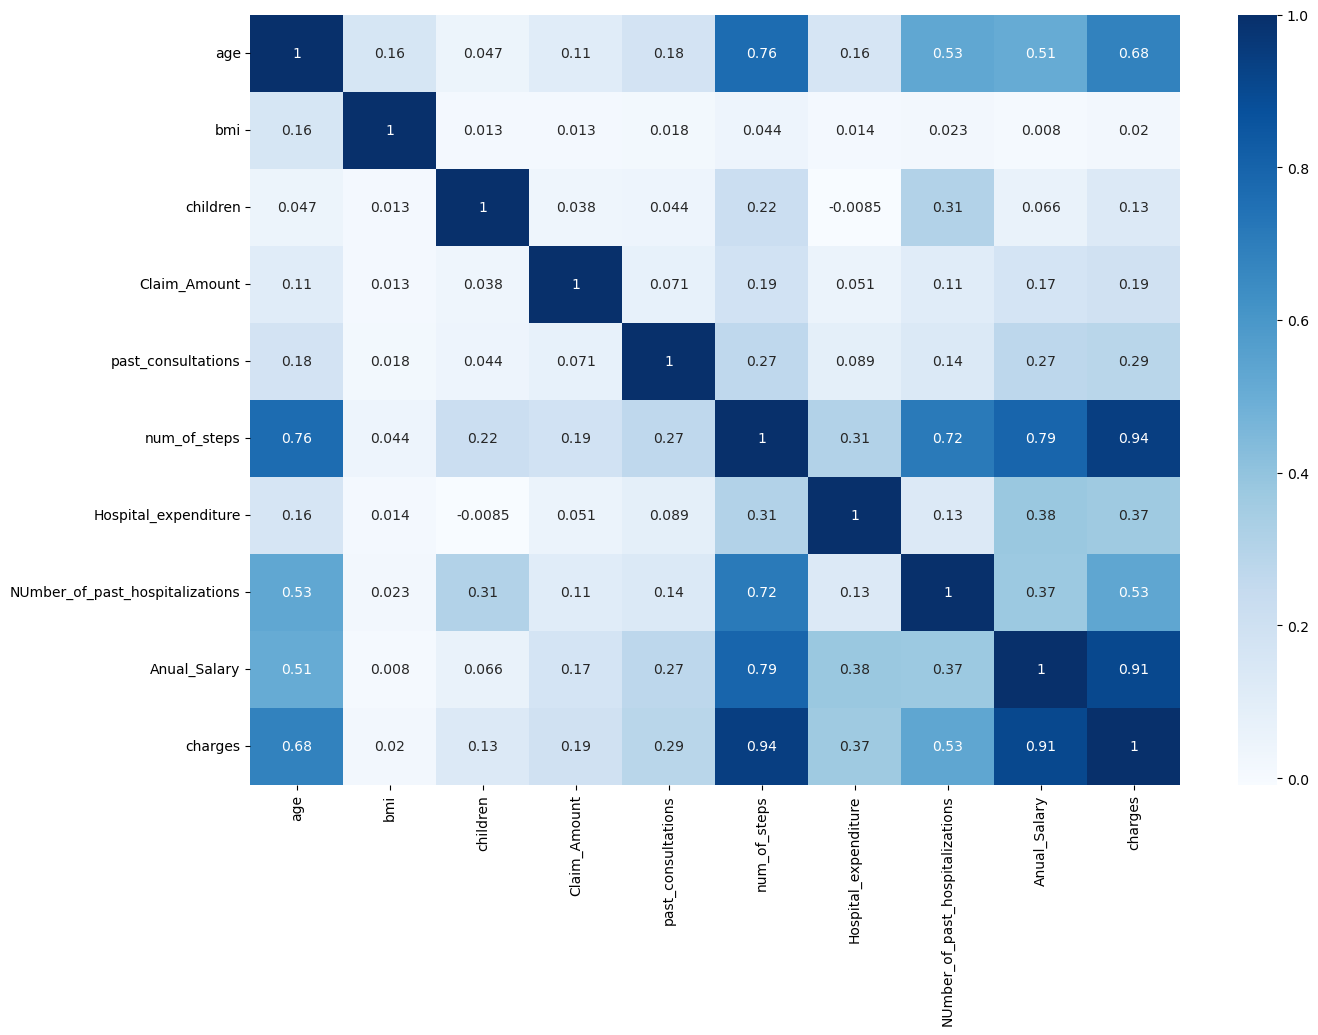

In [30]:
plt.figure(figsize=(15,10))

sns.heatmap(df.corr(), annot=True, cmap='Blues')

In [31]:
df.drop('num_of_steps', axis=1, inplace=True)

C:\Users\Dell1\AppData\Local\Temp\ipykernel_17208\3890864978.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Blues')


<Axes: >

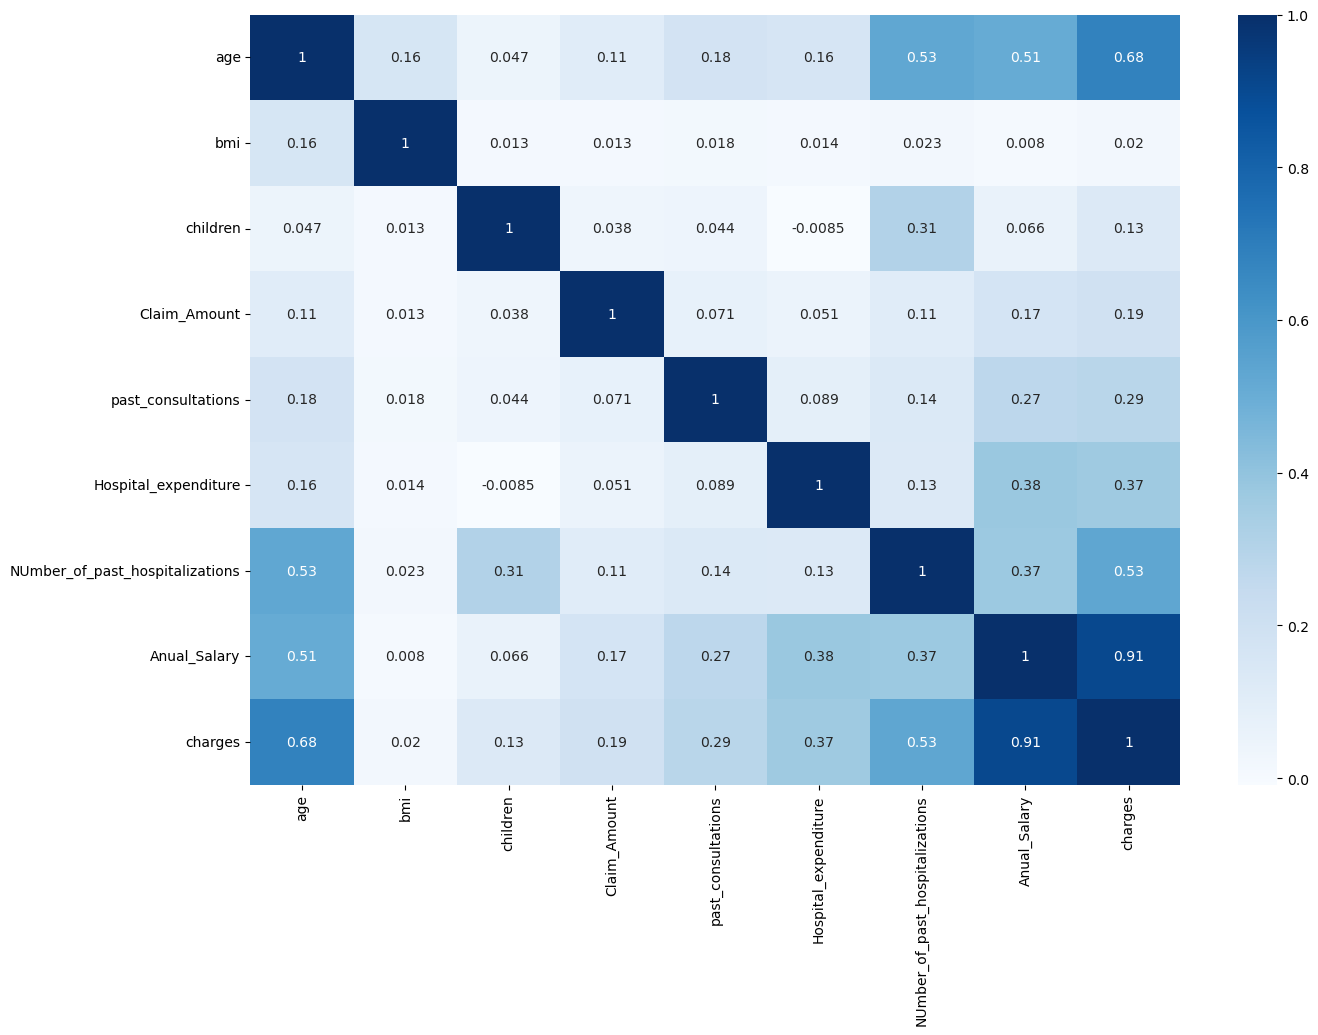

In [32]:
plt.figure(figsize=(15,10))

sns.heatmap(df.corr(), annot=True, cmap='Blues')

In [33]:
df.drop('Anual_Salary', axis=1, inplace=True)

C:\Users\Dell1\AppData\Local\Temp\ipykernel_17208\3890864978.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Blues')


<Axes: >

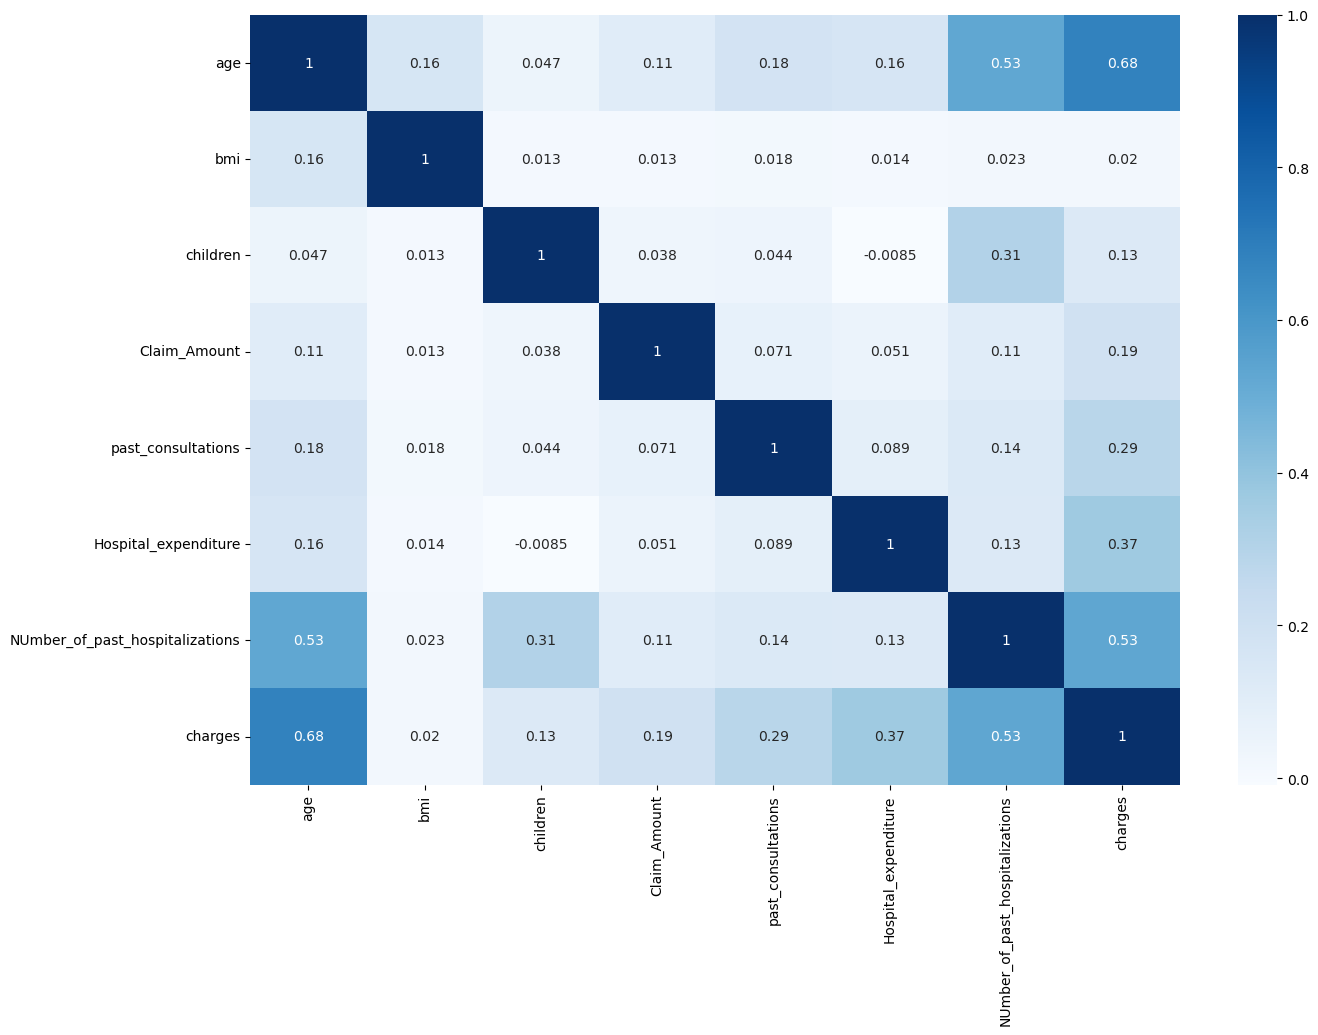

In [35]:
plt.figure(figsize=(15,10))

sns.heatmap(df.corr(), annot=True, cmap='Blues')

### Encoding Data

In [36]:
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,NUmber_of_past_hospitalizations,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,4720920.992,0.0,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,4329831.676,0.0,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,6884860.774,0.0,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,4274773.550,0.0,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,3787293.921,0.0,southeast,1137.0110


In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
le = LabelEncoder()

In [40]:
for col in df.columns:
    
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [41]:
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,NUmber_of_past_hospitalizations,region,charges
0,18.0,1,23.21,0.0,0,29087.54313,17.0,4720920.992,0.0,2,1121.8739
1,18.0,1,30.14,0.0,0,39053.67437,7.0,4329831.676,0.0,2,1131.5066
2,18.0,1,33.33,0.0,0,39023.62759,19.0,6884860.774,0.0,2,1135.9407
3,18.0,1,33.66,0.0,0,28185.39332,11.0,4274773.550,0.0,2,1136.3994
4,18.0,1,34.10,0.0,0,14697.85941,16.0,3787293.921,0.0,2,1137.0110


### Model Building

In [43]:
x = df.drop('charges', axis=1) # independent variables

In [45]:
y = df['charges'] # dependent variable

### Splitting the data

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=100)

In [49]:
x_train

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,NUmber_of_past_hospitalizations,region
121,18.0,0,35.625,0.0,0,18623.342090,10.0,3.582244e+04,0.0,0
57,18.0,1,30.030,1.0,0,43703.251260,20.0,6.195573e+06,0.0,2
543,45.0,1,39.805,0.0,0,9922.222111,8.0,5.802739e+06,1.0,0
861,59.0,0,35.200,0.0,0,22753.600730,24.0,1.073512e+07,1.0,2
288,30.0,1,44.220,2.0,0,30237.338710,15.0,4.117673e+06,1.0,2
...,...,...,...,...,...,...,...,...,...,...
903,60.0,0,24.035,0.0,0,19333.753130,9.0,7.226799e+06,1.0,1
919,63.0,1,30.800,0.0,0,49853.325820,22.0,9.828749e+06,1.0,3
881,57.0,0,25.740,2.0,0,29665.917510,22.0,2.673580e+06,1.0,2
838,55.0,0,30.140,2.0,0,9056.421480,24.0,6.361727e+06,1.0,2


In [50]:
y_train

121     2211.13075
57      1720.35370
543     7448.40395
861    12244.53100
288     4266.16580
          ...     
903    13012.20865
919    13390.55900
881    12629.16560
838    11881.96960
555     7682.67000
Name: charges, Length: 739, dtype: float64

In [51]:
x_test

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,NUmber_of_past_hospitalizations,region
1030,30.0,1,24.400,3.0,1,23306.74970,20.0,1.560269e+07,1.0,3
745,56.0,1,34.430,0.0,0,50004.29448,19.0,2.012874e+06,1.0,2
524,41.0,1,30.590,2.0,0,45803.60521,16.0,7.393671e+06,1.0,1
769,56.0,1,33.725,0.0,0,16543.73014,19.0,1.111280e+07,1.0,1
959,64.0,0,35.970,0.0,0,28727.00854,6.0,7.871808e+06,1.0,2
...,...,...,...,...,...,...,...,...,...,...
712,48.0,0,32.300,2.0,0,48984.90103,14.0,5.827840e+06,1.0,0
880,59.0,0,31.350,0.0,0,48296.87730,13.0,2.515130e+06,1.0,1
907,61.0,0,44.000,0.0,0,14825.98631,12.0,1.066482e+07,1.0,3
971,26.0,0,17.195,2.0,1,39926.67793,21.0,9.256594e+06,1.0,0


In [52]:
y_test

1030    18259.21600
745     10594.22570
524      7256.72310
769     10976.24575
959     14313.84630
           ...     
712     10043.24900
880     12622.17950
907     13063.88300
971     14455.64405
935     13747.87235
Name: charges, Length: 247, dtype: float64

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
li_model = LinearRegression()

In [56]:
li_model.fit(x_train, y_train)

LinearRegression()

In [57]:
y_pred = li_model.predict(x_test)

In [58]:
y_pred

array([19169.43797268, 10504.05668826,  8553.99076973, 11770.2843357 ,
       12741.46735749,  6529.65542471,  4727.75121633,  9806.26161579,
        7309.91358087,  2904.51689177,  6898.34436692,  9701.77366849,
        9010.47332525,  4586.6942429 ,  1508.73855334,  2666.65253251,
       12122.76499484,  5838.76099283,  2385.4081199 ,  1992.99965509,
        2634.04334371,  8422.82903357,  3774.07900123,  3147.13897074,
       10216.32159216,  7892.8901674 , 10796.51521017,  6301.33780166,
        8863.24153828, 21912.29994344,  8098.58172567,  2312.39866431,
        5474.35404673,  4193.31621514, 10155.12106384,  8755.7393419 ,
       12726.50885782,  9232.13861355, 12269.9462274 , 13173.12268666,
        9436.29323082,  7216.17745143,  8665.95197581,  1047.44141569,
        5565.51909992, 14552.85038597, 12924.16518092,  1744.31246339,
        4015.82690567,  4618.53919434, 12204.69052024,  7408.92960688,
        4482.79998478,  9913.94240882,  6916.0310126 ,  1456.6487874 ,
      

In [59]:
y_test

1030    18259.21600
745     10594.22570
524      7256.72310
769     10976.24575
959     14313.84630
           ...     
712     10043.24900
880     12622.17950
907     13063.88300
971     14455.64405
935     13747.87235
Name: charges, Length: 247, dtype: float64

In [60]:
from sklearn.metrics import r2_score

In [61]:
r2 = r2_score(y_test,y_pred)

In [62]:
print(r2)

0.8616042008357154


In [65]:
li_model.predict([[58.0,1,40.21,0.0,0,29087.54313,17.0,5550920.992,0.0,2]])

C:\Users\Dell1\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([10873.95304883])